### Name:  Paul Trayers

### Student ID:  8907021

# Task 2: Exploratory Data Analysis (EDA)

## Introduction

The dataset is extracted from a direct marketing campaigns of a Portuguese bank with the aim of predicting whether the client will subscribe a term deposit. Our approach will be to first explore the data without manipulation and then formulate an appropriate research question or questions. From there we will explore the numerical and categorical data and use various types of graphs to identify relationships and patterns in the data with a specific emphasis on the research question(s). Finally we will draw conclusions from analysis of the results.

## A. Load Dataset

Original dataset and full description of attributes [here](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

In [30]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a Pandas dataframe (two-dimensional array)

In [31]:
df = pd.read_csv('./bank.csv')

### A.1 Research Question

The following research question arises in relation to this dataset;

<div class="alert alert-block alert-warning">
Which clients should the bank focus its next campaign on?
</div>

We now break down further the research question to arrive at a set of specific questions that can be answered by exploring the dataset;

* In what segment of its client base does the best opportunity exist?
  * How does demographic profile of clients impact the likelihood of subscribing.
* How does financial status impact likelihood of subscribing?  
  * Which of a clients financial status attributes are most significant for subscription e.g. credit default, size of current balance, holding personal or housing loan. 
* How successful is the current campaign compared with the previous campaign?
  * How does execution of the two campaigns compare (number and durations of contacts etc.) 
  * How do the outcomes of the current campaign compare with previous (successfully subscribed clients).

We can use results from these questions to help identify target clients for the next campaign by identifying the optimium demographic segment and current financial status for our next campaign.  We can also decide whether the current campaign strategy is an improvement on the previous one and we can continue with this or need to adopt some alternative strategy.  

### A.2 Data Attributes Description

Client attributes may be conveniently grouped as follows; demographic, financial status, current and previous campaign contact details as well as details about the last client contact. The `subscribed` attribute  indicates whether the client subscribed to the term deposit product we can consider as an output variable.

#### Input variables
*Demographic:*
age,job,marital,education,

*Financial Status:*
default,balance,housing,loan

*Current campaign:*
campaign,pdays,subscribed

*Previous campaign:*
previous,poutcome

*Last contact details:*
contact,day,month,duration,

#### Output
*Signed up for product:*
subscribed

## B. Quick Data View

In [32]:
print(df.shape)
df.head(10)     # Print first 5 rows of the dataframe

(2000, 17)


age            job   marital  education default  balance housing loan  \
0  32.0     technician    single   tertiary      no      392     yes   no   
1  39.0     technician  divorced  secondary      no      688     yes  yes   
2  59.0        retired   married  secondary      no     1035     yes  yes   
3  47.0    blue-collar   married  secondary      no      398     yes  yes   
4  54.0        retired   married  secondary      no     1004     yes   no   
5  46.0  self-employed  divorced   tertiary      no      926     yes   no   
6  34.0    blue-collar   married  secondary      no     1924     yes  yes   
7  45.0       services  divorced  secondary      no      396     yes  yes   
8  58.0     management  divorced   tertiary      no      315     yes   no   
9  49.0     management  divorced   tertiary      no    20727      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   
5  cellular    1   apr       463         1    133         3  failure   
6  cellular    1   apr       161         2    253         1  failure   
7  cellular    1   apr       251         4    329         4  failure   
8  cellular    1   apr       121         2    135         2  failure   
9  cellular    1   apr       285         3    132         2  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no  
5         no  
6         no  
7         no  
8         no  
9         no

In [33]:
df.tail(10)     # Print last 5 rows of the dataframe

age           job   marital  education default  balance housing loan  \
1990  36.0    technician   married   tertiary      no      376      no   no   
1991  39.0        admin.  divorced  secondary      no      112      no   no   
1992  78.0       retired  divorced    primary      no      527      no   no   
1993  35.0    management   married        NaN      no     2326     yes  yes   
1994  26.0       student    single  secondary      no      655      no   no   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1990   cellular   16   sep       173         1     -1         0      NaN   
1991   cellular   16   sep       574         3     -1         0      NaN   
1992   cellular   16   sep       193         1     -1         0      NaN   
1993   cellular   16   sep       319         1     -1         0      NaN   
1994   cellular   16   sep       190         1     -1         0      NaN   
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1990        yes  
1991        yes  
1992        yes  
1993        yes  
1994        yes  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

### Observations

We observe the dataset containing 2000 observations or examples (data rows) including both numerical and categorical attributes/features.  Categorical attributes include some boolean fields containing yes/no.  We also note presence of NaN values which indicate missing/invalid values.

`subscribed` attribute indicates whether the client subscribed to the term deposit product (yes) or not (no).  This attribute is a primary candidate for an attribute to *learn* to predict from the values of the other input attributes.

### B.1 Numerical Attributes - Quick View

In [34]:
# Print statistical summary for all numerical attributes
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [35]:
# Frequency table to missing values
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

### B.1.1 Numerical Attributes - Observations

We can make some observations and draw some initial inferences by looking at the output of `describe()`:

- `age` has 12 missing values (2000 – 1988).
- `balance` has a median less than its mean suggesting a positive skew - being skewed to the right with a longer tail on the right side indicates a smaller group of clients have disproportionally high balances.
- `campaign` indicates a mean of around 2 contacts per client for the current campaign compared with a mean of 2.5 for the `previous` campaign indicating the number of contacts per client has decreased by around 0.5 for the current campaign.

- `campaign` has minimum of 1.0 indicating that all clients were contacted at least once during last campaign. In contrast, `pdays` minimum value of -1 and `previous` minimum of zero indicates that at some clients were not contacted at all during the previous campaign. 
- `campaign`, `duration` and `previous` have medians (50th PCTL) less than their mean suggesting these distributions may be positively skewed, being skewed to the right with a longer tail on the right side.
- `pdays` has median greater than the mean suggesting this distribution is negatively skewed, being skewed to the left with a longer tail on the left side. 

### B.1.2 Numerical Attributes - Conclusions

While not conclusive we may draw some potential suggestions from the descriptive statistics above;
* There is a long tail of clients with balances higher than the mean.
* Current campaign averages fewer contacts per client (mean = 2) compared with the previous campaign (mean = 2.5), however while some clients where not contacted on the previous campaign (min = 0) all clients are contacted at least once on the current campaign (min > 0). 

This suggests that the current campaign may have spread the net more widely contacting all clients but less frequently. However we will examine further to confirm these initial findings.



### B.1.3 Numerical Attributes - Heat Map (Correlations)
Examining the correlation matrix of all numerical attributes in the form of a heat map.

/var/folders/98/vx93yfrj62l8gzhcl0bdw8xh0000gn/T/ipykernel_92899/4066347534.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, cmap='coolwarm');


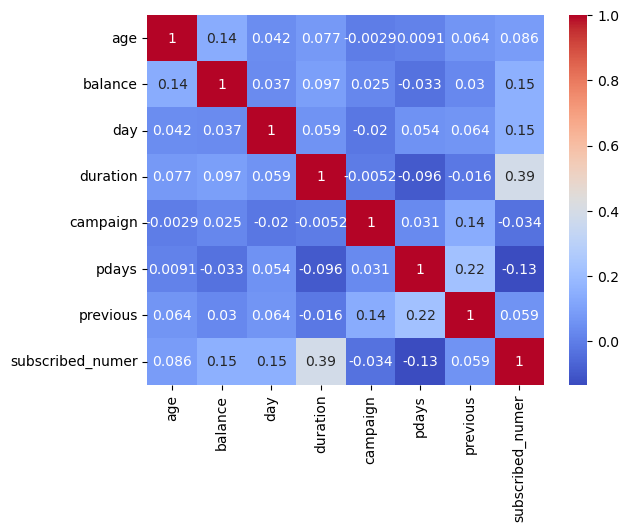

In [36]:
# Append addtional column to the dataframe with a numeric mapping for `subscribed`
df2 = df.assign(subscribed_numer = df['subscribed'].map({'yes': 1, 'no': 0}))

#correlation matrix
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm');

### B.1.3.1 Heat Map - Observations

* Moderate correlation between `duration` and `subscribed` of 0.39 indicates a correlation between the duration of the last contact call and whether the client is subscribed.

* Weak correlation between `pdays` and `previous` at 0.22, indicates some correlation between number of days since client was last contacted from a previous campaign and frequency of client contact. This suggests that if a client wasn't contacted for a longer period they were more likely to then receive more frequent contacts during the previous campaign suggesting perhaps an effort to restore the client relationship.

* Weak correlation between `subscribed` and `balance` at 0.15, suggests that the client may be more willing to subscribe as their balance increases.

* Weak correlation between `subscribed` and `day` at 0.15, suggests that the client may be more willing to subscribe if contacted at a certain times of the month.

* Weak correlation between `age` and `balance` at 0.14, suggests that the size of clients balance increases with age.

* Weak correlation between `campaign` and `previous` is also 0.14, indicates a weak correlation between number of contacts made per client during this campaign and number of contacts prior to the campaign. This may perhaps be due to following up leads with clients who appeared to be better prospects from previous contacts.


### B.1.3.2 Heat Map - Conclusions

Other than the moderate correlation between `subscribed` and duration, the heat map suggests generally weak correlation amongst attributes being no greater than 0.22, meaning little to no _linear_ relationship between the variables. However, we will keep in mind that weak correlation does not necessarily imply that there is _no_ relationship between the variables. 

Also since there are categorical fields which contain boolean values as well as distinct sets of values we may choose convert some of these to numeric in order to visualise with the heat map.

### B.1.4 Pairwise Plot

We can further examine the pairwise distribution between all attributes in a pair plot.

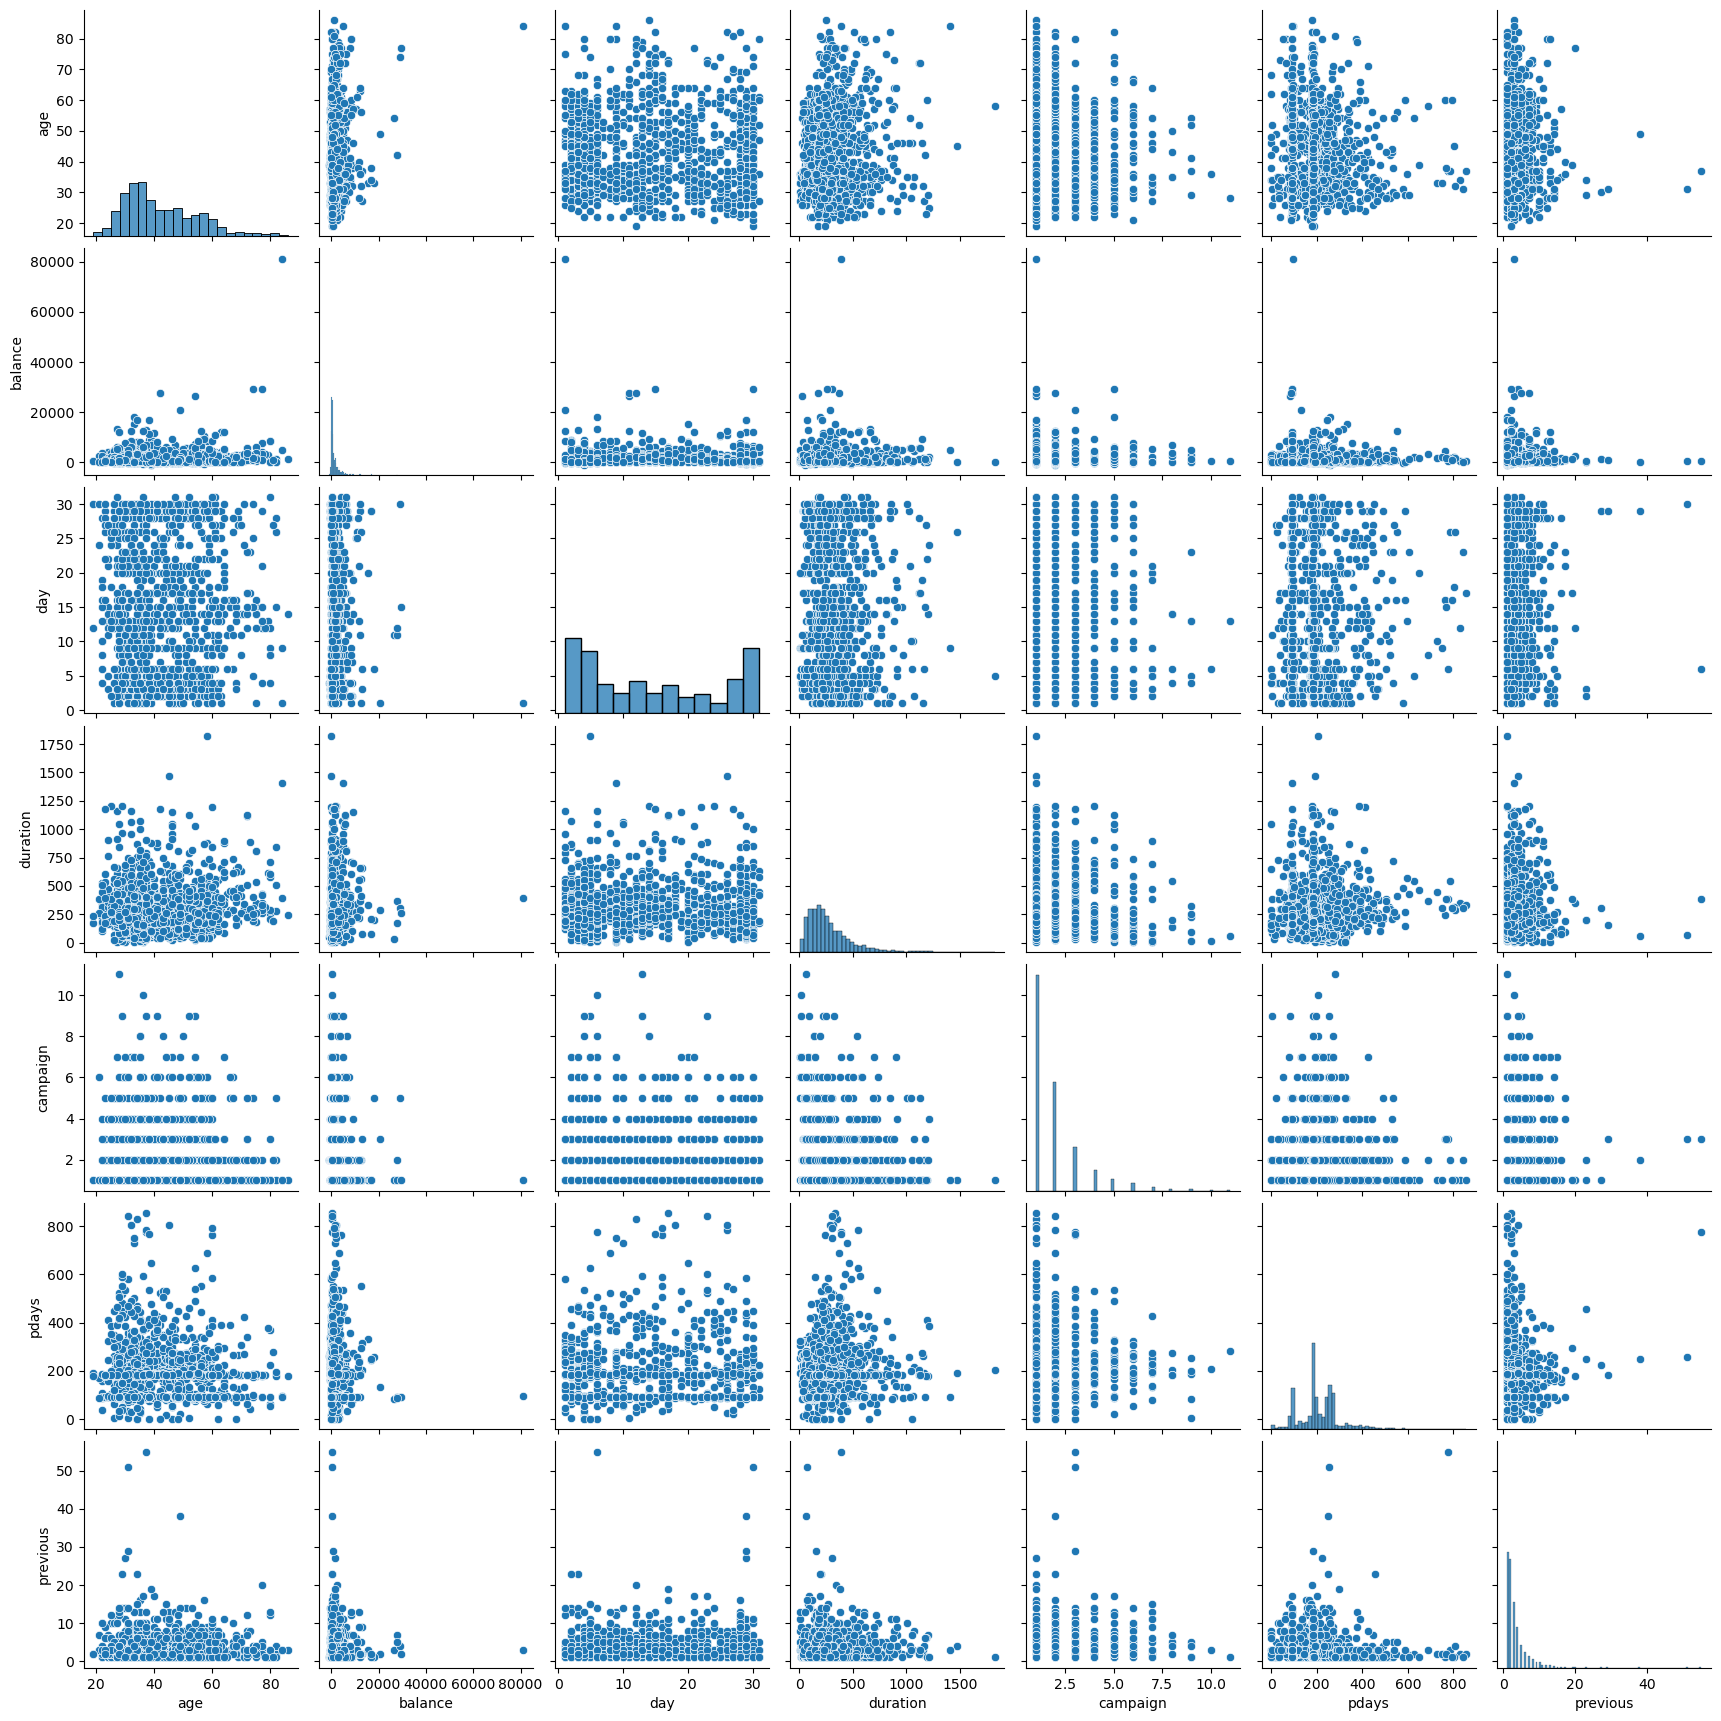

In [37]:
# Since mostly weak correlation is evident, we will go ahead and plot all numerical attributes.
# note that by applying the method dropna() we drop *all* rows with missing values
sns.pairplot(data=df.dropna())
#sns.pairplot(data=df[['pdays','previous','campaign']].dropna())  # plot specific set of fields
plt.show()

### B.1.4.1 Pairwise Plot - Observations

The histogram on the diagonal allows us to see the distribution of each variable. This helps to clarify the suggestions in the above conclusions from the descriptive statistics through the histograms along the diagonal which confirm skewness in some attributes and indicate how some of the weak correlations from the pair plots.  

### B.1.4.2 Pairwise Plot - Conclusions

The pair plot confirms much of what we already found from the heat map and descriptive statistics.  We will try to extend the pair plots by identifying the `subscribed` category by colouring the points to see if this reveals further relationships to this output variable. 

### B.1.4.1 Pairwise Plot  (add `subscribed` category)

Here we extend the pairwise plot to identifying the subscribed clients in each pair plot and splitting the histograms to identify distributions for those clients that are subscribed versus those who are not.  This provides a better visual indicator of where the distribution of subscribed clients across the various attibutes and attribute pairs lies.  Vertical and horizontal line type points are used to better visualise subscribed and unsubscribed data points together, as using other shapes tends to crowd out and hide other points.

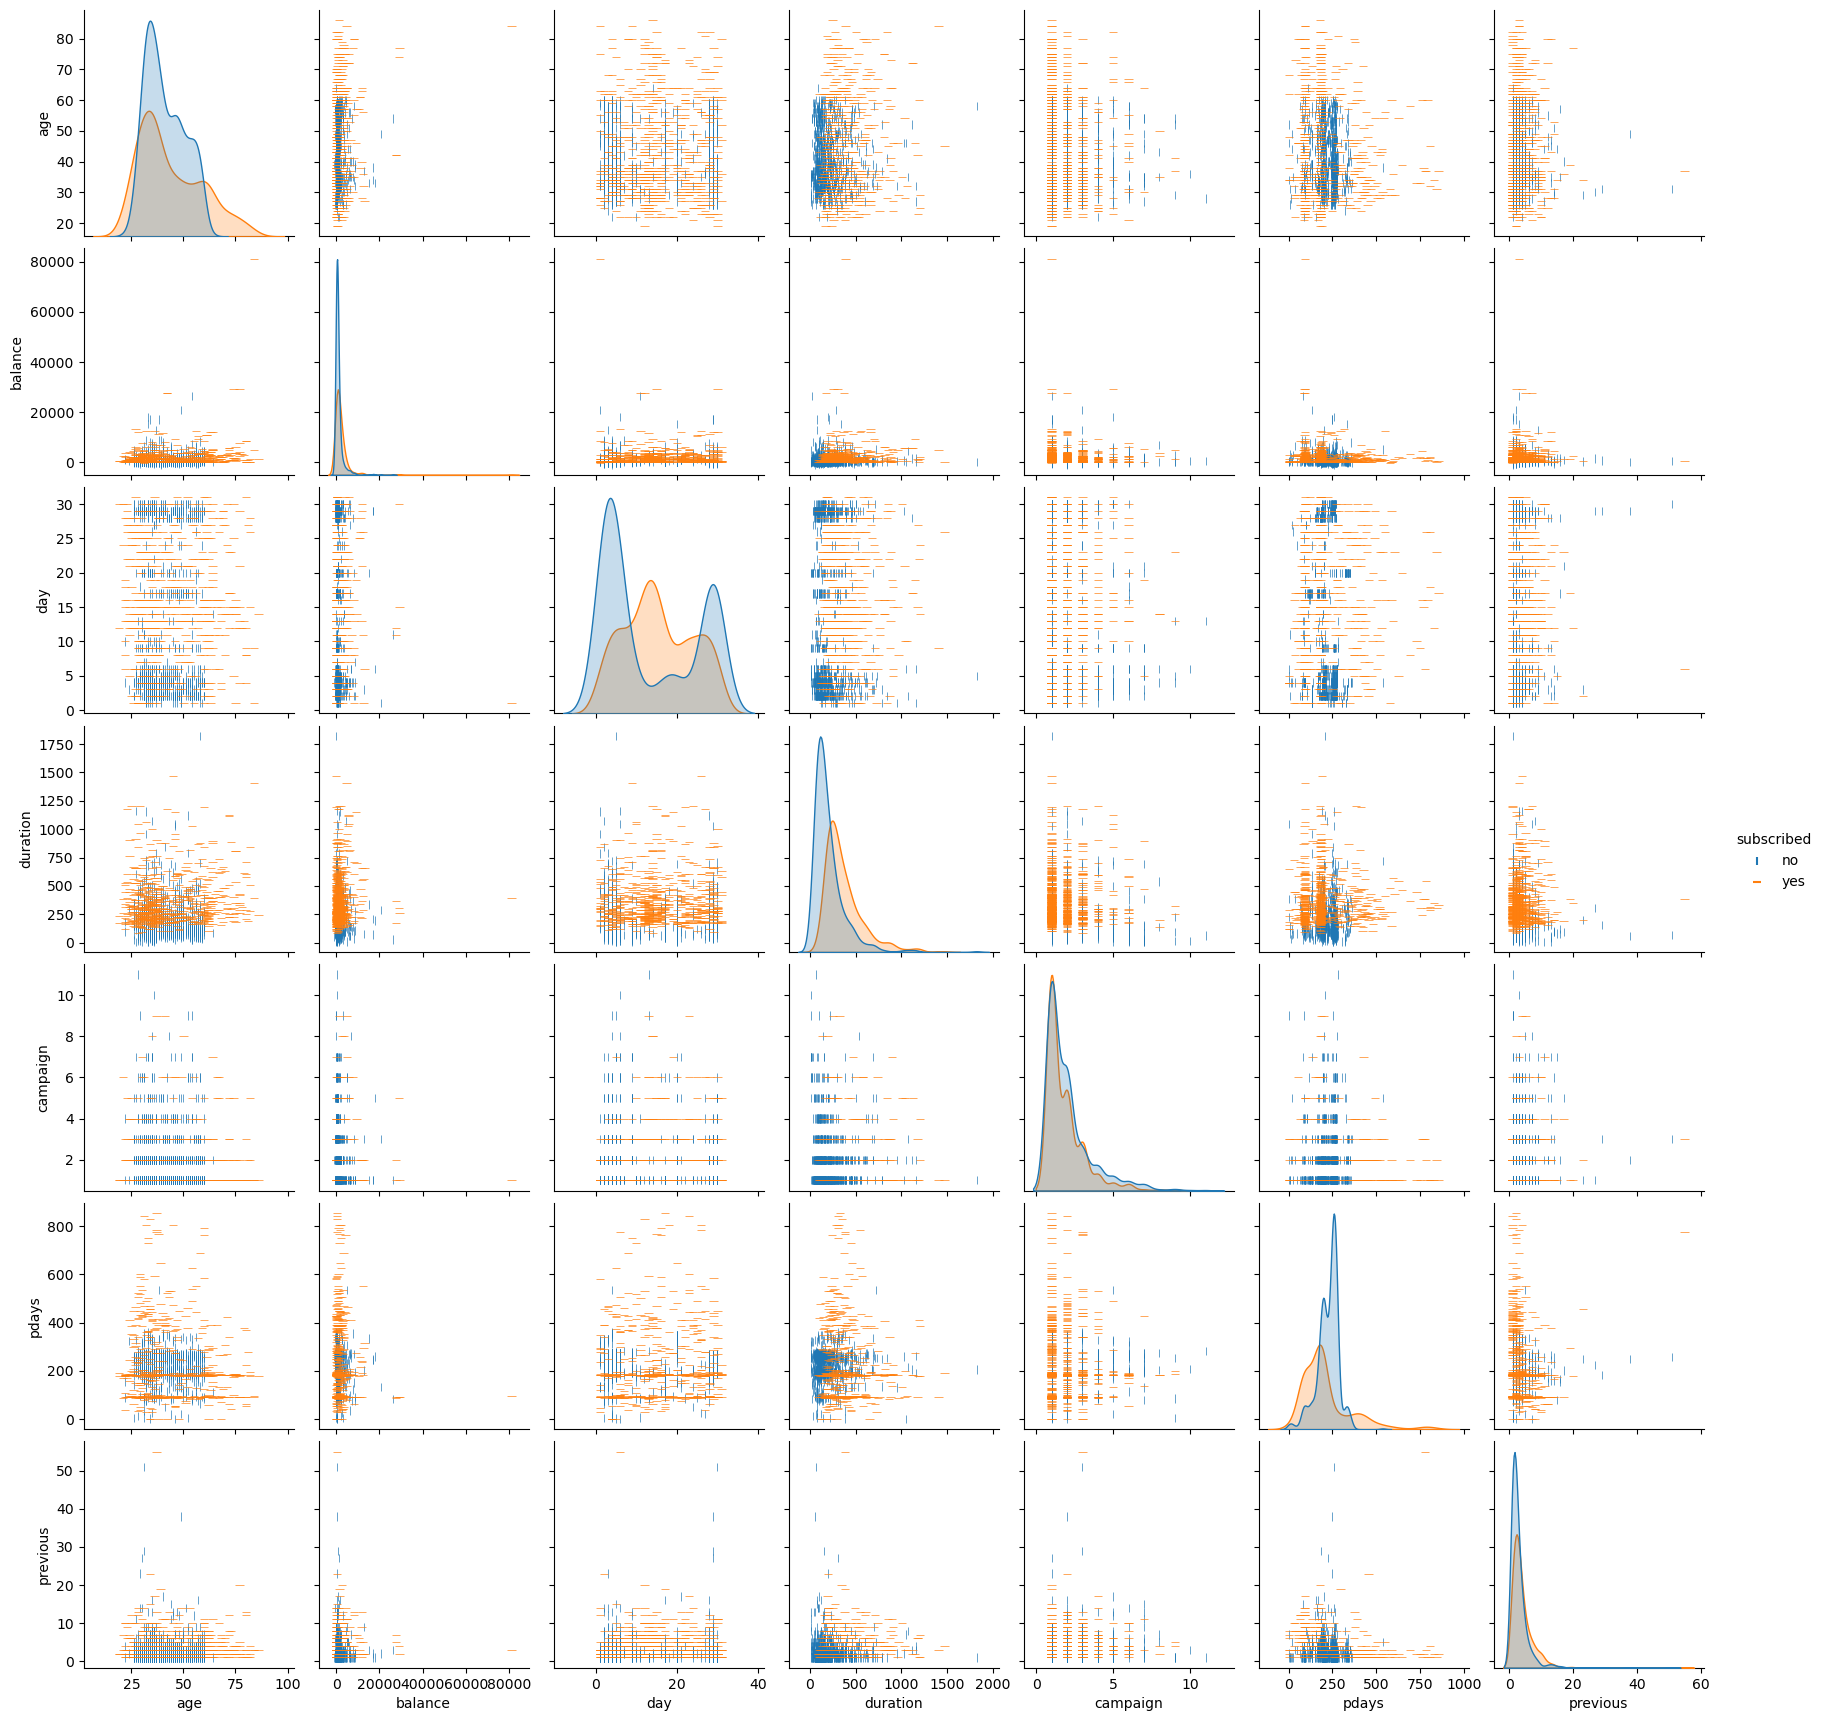

In [38]:
# note that by applying the method dropna() we drop all rows with missing values
sns.pairplot(data=df.dropna(), hue="subscribed", markers=['|', '_'])
#sns.pairplot(data=df[['pdays','previous','campaign']].dropna())
plt.show()

### B.1.4.2 Pairwise Plot  (add `subscribed` category) - Observations

* `day` histograms show clients called the middle of the month much more likely to subscribe.
* `duration` shows longer calls (weakly) correlated with subscribed clients which may indicate more successful agents.
* `pdays` histograms indicate after certain number of days passing without contact, client much less likely to subscribe.
* `age` histogram shows that potential demographic (not subscribed) within age group around 20-35
* Median age < 40 but also older outliers who might not be interested in subscription. 

### B.1.4.3 Pairwise Plot  (add `subscribed` category) - Conclusions

Some possible conclusions from above observations;
* Clients called in the middle of the month may be more likely to subscribe
* Longer calls may result in higher likelyhood of a subscribing customers, unless perhaps the additional time is due to making further arrangements or giving further information post subscription i.e. not causation
* If too many days are left without follow-up contact, chances are client loses interest.
* Potential target segment is 20-35 age group with a lot of that cohort not subscribed.

### B.2. Categorical Attributes - Quick View

First we identify the categorical attributes distinct from numeric fields;

In [39]:
cols = df.columns
numer_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(numer_cols))
print(f"\nCategory Fields:\n{cat_cols}")
print(f"\nNumeric Fields (for reference):\n{numer_cols}")


Category Fields:
['job', 'month', 'housing', 'education', 'poutcome', 'loan', 'contact', 'default', 'subscribed', 'marital']

Numeric Fields (for reference):
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


We can view the frequency table of each categorical attribute to understand how well it is represented in the dataset.

In [40]:
print(df.value_counts(["default"]))
print(f"\nTotal: ", df["default"].count())

default
no         1985
yes          15
dtype: int64

Total:  2000


In [41]:
print(df.value_counts(["subscribed"]))
print(f"\nTotal: ", df["subscribed"].count())

subscribed
no            1000
yes           1000
dtype: int64

Total:  2000


In [42]:
print(df.value_counts(["job"]))
print(f"\nTotal: ", df["job"].count())

job          
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
dtype: int64

Total:  1990


In [43]:
print(df.value_counts(["month"]))
print(f"\nTotal: ", df["month"].count())

month
feb      404
may      333
jan      245
apr      205
jul      167
aug      136
sep      134
jun      104
oct       93
mar       70
nov       68
dec       41
dtype: int64

Total:  2000


In [44]:
print(df.value_counts(["loan"]))
print(f"\nTotal: ", df["loan"].count())

loan
no      1750
yes      250
dtype: int64

Total:  2000


In [45]:
print(df.value_counts(["education"]))
print(f"\nTotal: ", df["education"].count())

education
secondary    995
tertiary     684
primary      217
dtype: int64

Total:  1896


In [46]:
print(df.value_counts(["housing"]))
print(f"\nTotal: ", df["housing"].count())

housing
no         1037
yes         963
dtype: int64

Total:  2000


In [47]:
print(df.value_counts(["poutcome"]))
print(f"\nTotal: ", df["poutcome"].count())

poutcome
failure     955
success     444
other       147
dtype: int64

Total:  1546


In [48]:
print(df.value_counts(["marital"]))
print(f"\nTotal: ", df["marital"].count())

marital 
married     1111
single       674
divorced     215
dtype: int64

Total:  2000


In [49]:
print(df.value_counts(["contact"]))
print(f"\nTotal: ", df["contact"].count())

contact  
cellular     1663
telephone     146
dtype: int64

Total:  1809


### B.2.1 Categorical Attributes - Observations

The following observations are made on the above frequency tables on categorical data;

* `default` - 7.5% of clients have a credit default (15)
* `subscribed` - even split of subscribers / non-subscribers (50% each)
* `job` - 23% (461) of clients have a job in management as the highest of 11 categories
* `loan` - 12.5% of clients have a personal loan (250) 
* `education` - 36% of clients have a tertiary education (684) and 52% have secondary education (995)
* `month` - Jan,Feb,Apr,May are top months in which most contacts were made representing 63% of all contacts (1187).
* `housing` - even split between clients having housing loans 48% (963) and those that do not 52% (1037).
* `poutcome` - 28.7% of all clients subscribed as a result of the previous campaign (444 / 1546).
* `marital` - 56% of all clients are married and remaining 48% are single or divorced
* `contact` - 92% of all clients have cellular contacts, just 8% having landline.


### B.2.2 Categorical Attributes - Conclusions

The following are some possible conclusions from above observations;

* Management as the highest job category (23%), a relatively modest level of personal loans 12.5% and housing loans 48% and 56% of client married we get a sense of a professional, reasonably affluent client base.
* It seems that there are or were two intense two-month contact periods in the months of Jan/Feb and Apr/May representing 32% and 27% respectively of all contacts made in the year. It may be worth checking subscribed outcomes from these months compared with other months to determine whether these intense contact periods might be better if changed to other months.
* A small number of clients (8%) we have landline contact - may be worth requestng to update their cellular contact.

## C. Distribution Analysis for Numerical Attributes

Here we create side-by-side plots of the distributions of each of the numerical fields with boxplot and violin plots.


Numeric Fields:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


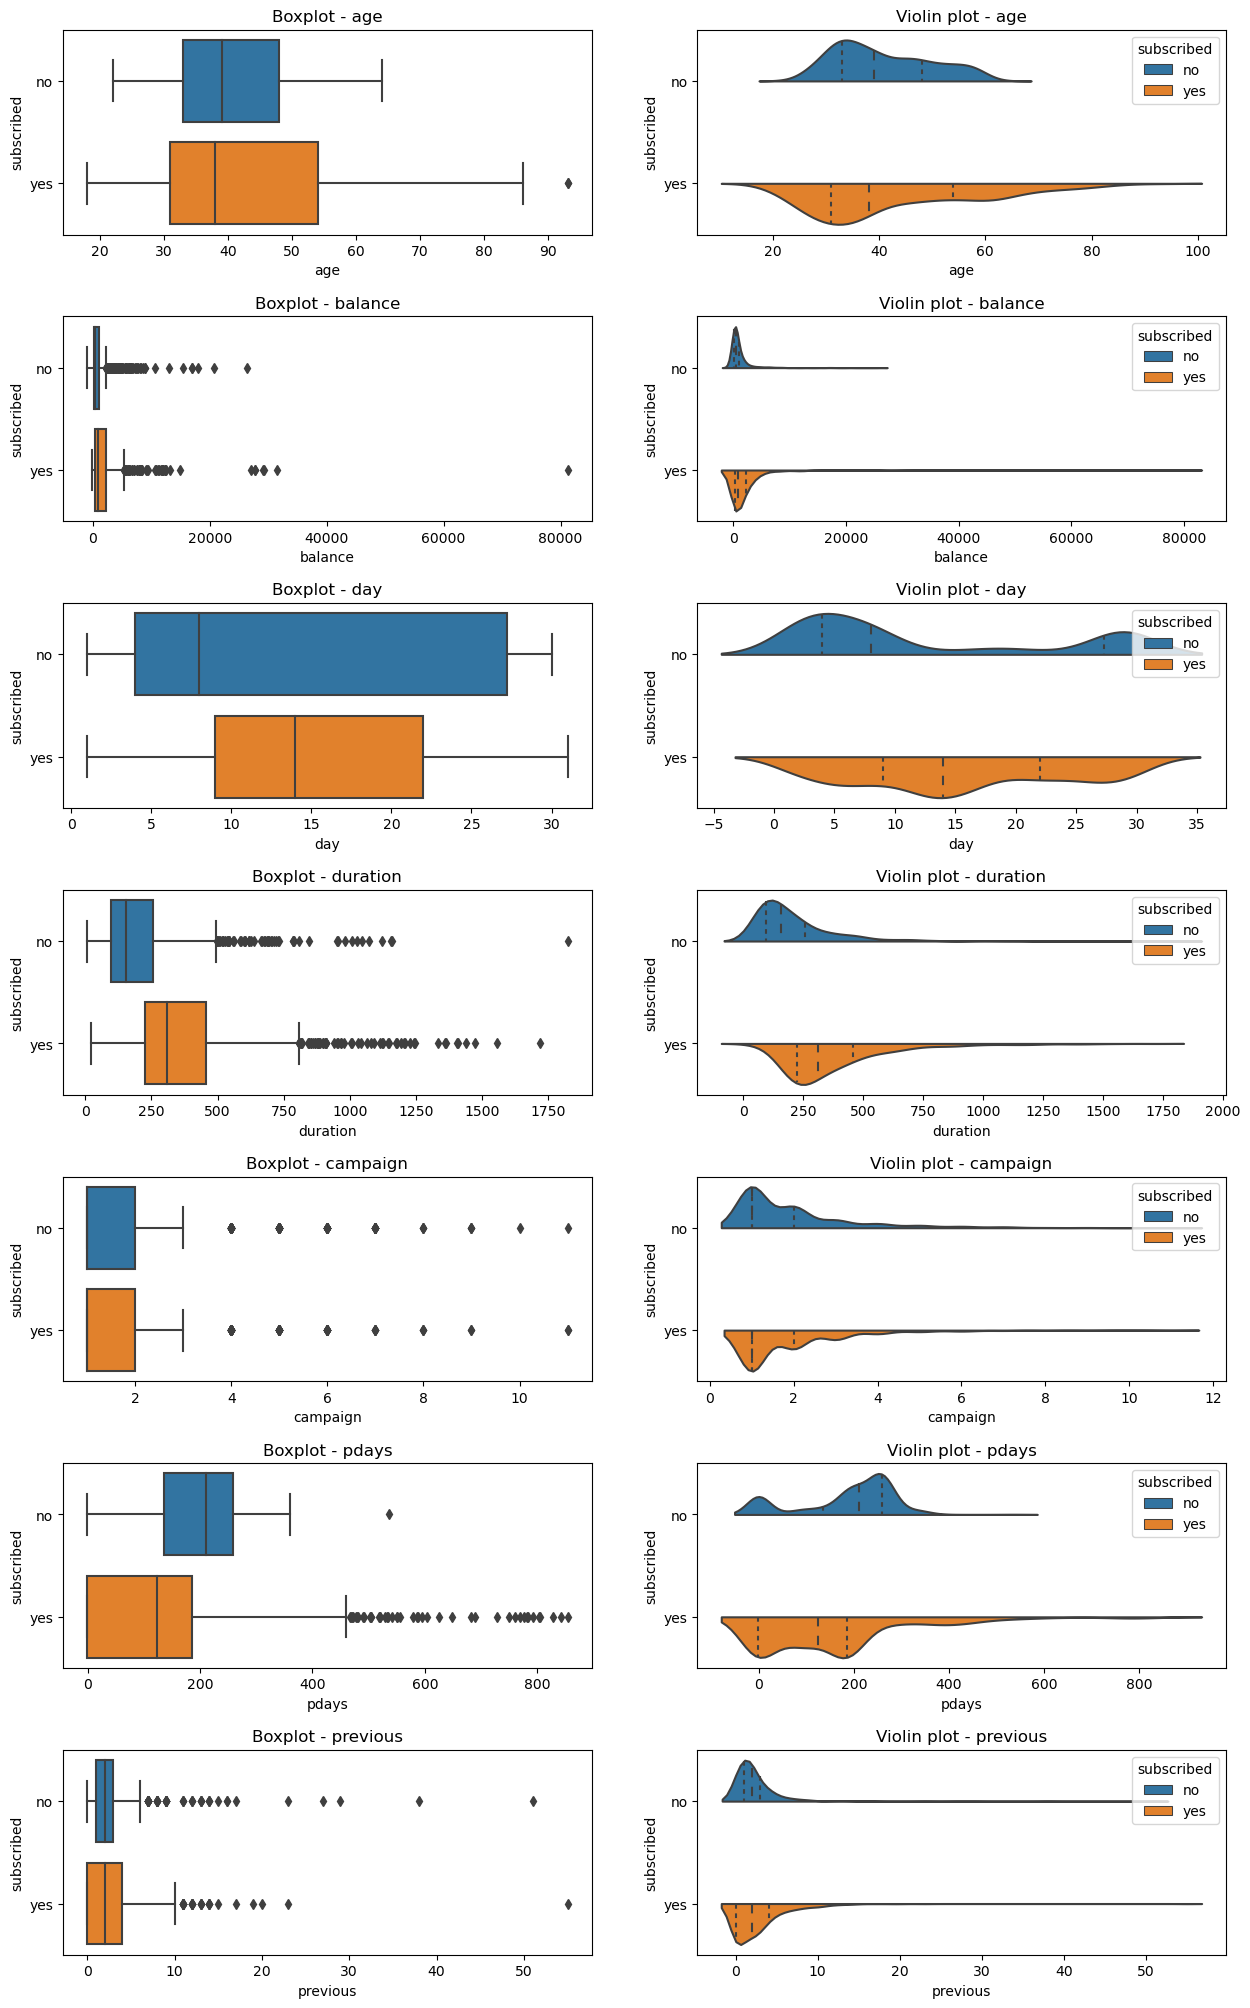

In [50]:
# Print the numeric field names for reference
cols = df.columns
numer_cols = df._get_numeric_data().columns
print(f"\nNumeric Fields:\n{numer_cols}")

# Set up the figure layout with three rows and two columns of subplots
# first element of tuple returned by shape contains number rows in df..
fig, axs = plt.subplots(nrows=numer_cols.shape[0], ncols=2, figsize=(15, 25))

# Loop through each set of data and plot the boxplot and violin plot on each subplot
for i, col in enumerate(numer_cols):
    sns.boxplot(data=df, ax=axs[i, 0], x=col, y='subscribed', orient='h', notch=False) #, color='lightblue')
    axs[i, 0].set_title(f"Boxplot - {numer_cols[i]}")
    sns.violinplot(data=df, ax=axs[i, 1], x=col, y='subscribed', hue='subscribed', split=True, inner="quartile")
    axs[i, 1].set_title(f"Violin plot - {numer_cols[i]}")

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the figure
plt.show()

We will re-plot `balance` to remove the outlier from the graph (not from the dataset) to provide clearer graph of the quartiles.

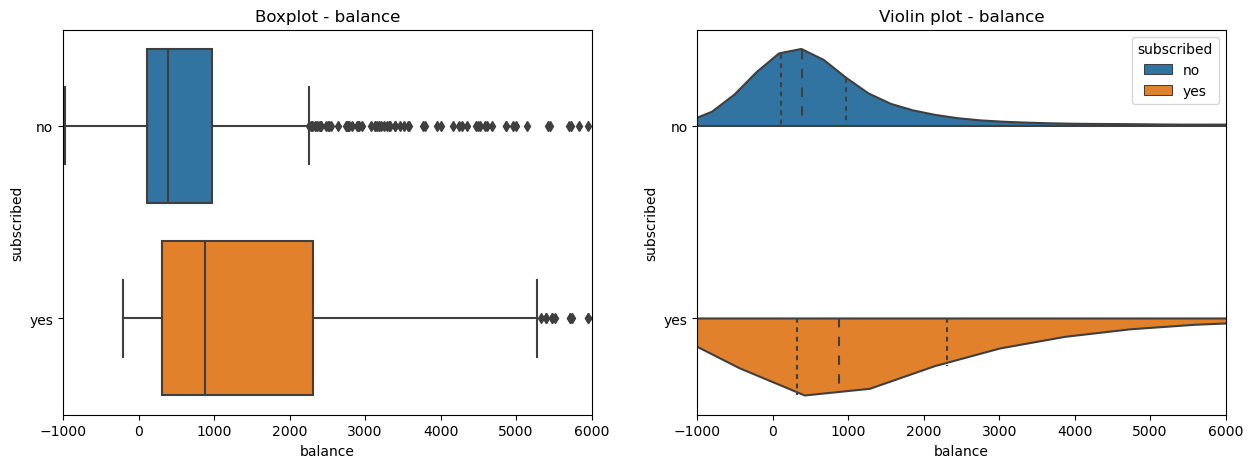

In [51]:
# Set up the figure layout with three rows and two columns of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the boxplot and violin plot for balance data
sns.boxplot(data=df, ax=axs[0], x='balance', y='subscribed', orient='h', notch=False) #, color='lightblue')
axs[0].set_title(f"Boxplot - balance")
sns.violinplot(data=df, ax=axs[1], x='balance', y='subscribed', hue='subscribed', split=True, inner="quartile")
axs[1].set_title(f"Violin plot - balance")
axs[0].set_xlim([-1000, 6000])
axs[1].set_xlim([-1000, 6000])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the figure
plt.show()

### C.2 Distribution Analysis for Numerical Attributes - Observations

Observations based on above plots;

* `balance` box plots shows most clients subscribed with a median balance around ~800. Balances > ~1000 much greater chance of subscription.
* `balance` violin plots confirm the presence of a lot of outliers/extreme values. This may be attributed to the wealth disparity in the society. Part of this can be due to the fact that we are looking at people with different job levels (blue-collar versus management) or at different life stage (student versus retired). 

* `age` of subscribed clients has median ~37 and has a positive skew people across older ages more likely subscribe.

* `day` plots indicate more successful subscriptions for calls made during the middle days of the month with median around 12th.
* `duration` shows that calls with subscribed clients lasted upwards of ~250 minutes.
* `campaign` plot show number of contacts split very evenly between subscribed and not subscribed clients.
* `pdays` plots show that during the previous campaign subscribed clients waited far fewer days for call from the following campaign < ~180 days.
* `previous` shows fairly even split in number of contacts between subscribed and not subscribed.

### C.2 Distribution Analysis for Numerical Attributes - Conclusions

To align with our research question we may draw some conclusions grouped under the areas defined by the sub-questions;

*Demographic*
* Potential target segment is 20-35 age group with a lot of that cohort not subscribed.

*Financial*
* While an even distribution of subscribed and non-subscribed exists for balances up to 1000, for higher balances there appears to be a significantly higher likelyhood of subscription.

*Campaign*
* Clients called in the middle of the month may be more likely to subscribe. Campaigns may consider avoiding start and end of months, perhaps co-incides with monthly bill and loan payments.
* Longer calls coincide with higher likelyhood of subscribing customers - which indicative of a successful call no evidence exists of any causation i.e. i.e. time could simply be agent gathering details or providing further information. Also unsuccessful calls may be likely to end more quickly if prospects simply shut down calls earlier.
* Follow-up call within < ~180 days has a good chance to subscribe clients who didn't subscribe in the previous campaign. If too long between campaigns less chance clients will then subscribe.

## C. Distribution Analysis for Categorical Attributes

Beyond our earlier quick view on categorical data using fequency tables we will now check histograms of all attributes to clarify if their are any further significant observations in the distribution.


Category Fields:
['job', 'month', 'housing', 'education', 'poutcome', 'loan', 'contact', 'default', 'subscribed', 'marital']


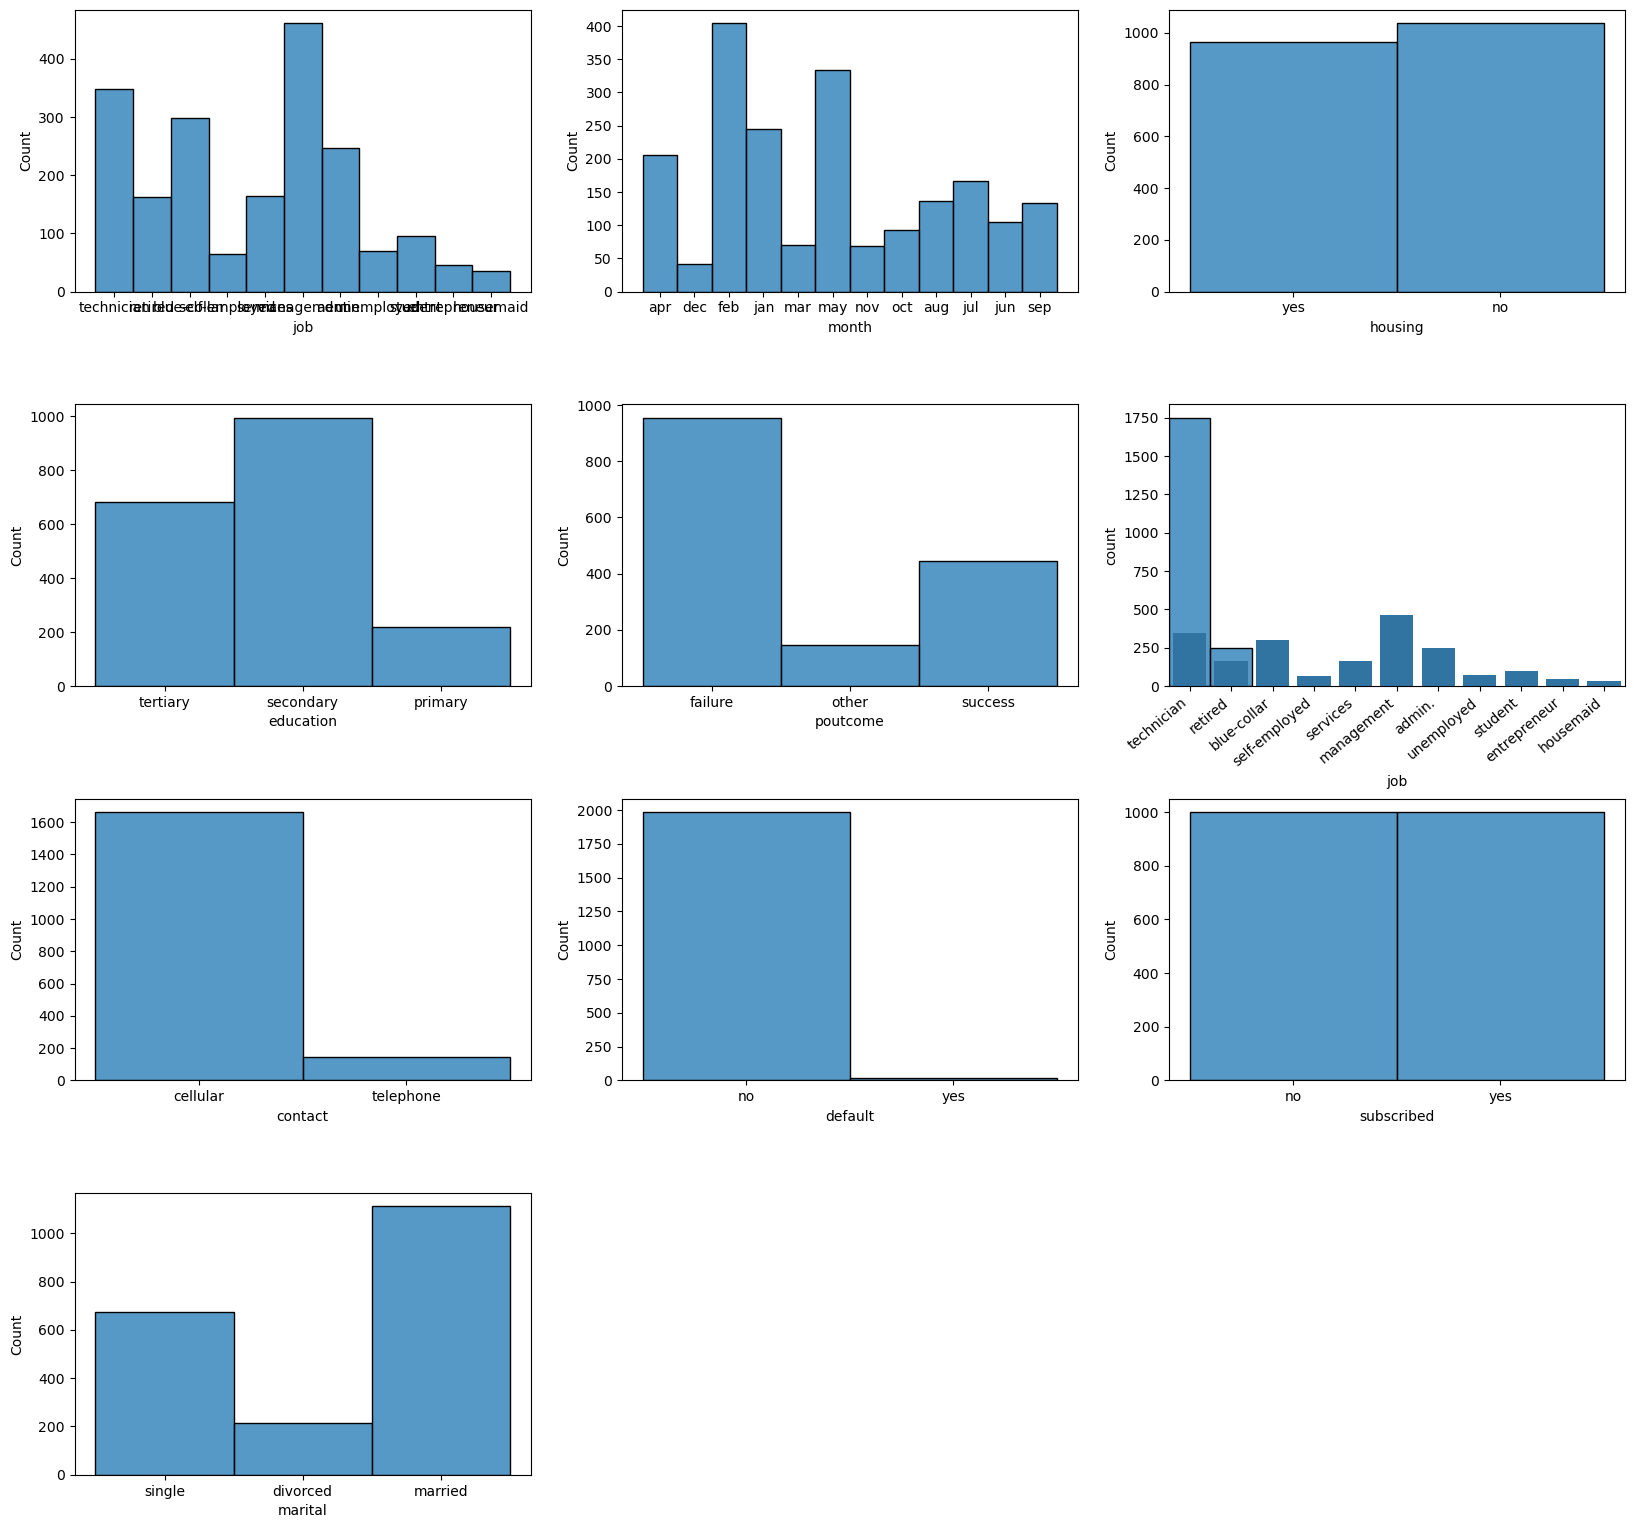

In [52]:
cols = df.columns
cat_cols = list(set(cols) - set(numer_cols))
print(f"\nCategory Fields:\n{cat_cols}")

plt.figure(figsize=(20,60))
i = 1
for col in cat_cols:
    ax = plt.subplot(12,3,i)
    plot = sns.histplot(x=df[col], data=df[col])    
    #plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
    plt.xlabel(col)
    i+=1

# Replace 'job' plot in its position in order to rotate the x labels..
ax = plt.subplot(12,3,6)
plot = sns.countplot(x='job', data=df, color='C0')
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

plt.show()

### C.1 Distribution Analysis for Categorical Attributes - Observations

We have already made a good number of observations on categorical in the earlier section _Categorical Attributes - Quick View_. The histograms here uphold the observations from that section with no significant new observations.

## E. Combined Distribution Analysis

We will now can use combined plots incorporating both numerical and categorical attributes to help answer the the set of specific set of sub-questions comprising the research question of which clients should the bank focus its next campaign on

We can use results from these questions to help identify target clients for the next campaign by identifying the optimium demographic segment and current financial status for our next campaign.  We can also decide whether the current campaign strategy is an improvement on the previous one and we can continue with this or need to adopt some alternative strategy.  

### E.1 Combined Distribution Analysis - Demographic

Our research question in relation to demographics is as follows;

* In what segment of its client base does the best opportunity exist?
  * How does demographic profile of clients impact the likelihood of subscribing.

We previously observed that `balance` is probably the most significant of the numerical attributes influencing subscription. Given this we wuld like to analyse relationship between this and key demographic variables being `job`, `education`, `marital` and `age`... 

First we plot balance against the categorical demographic variables.. 

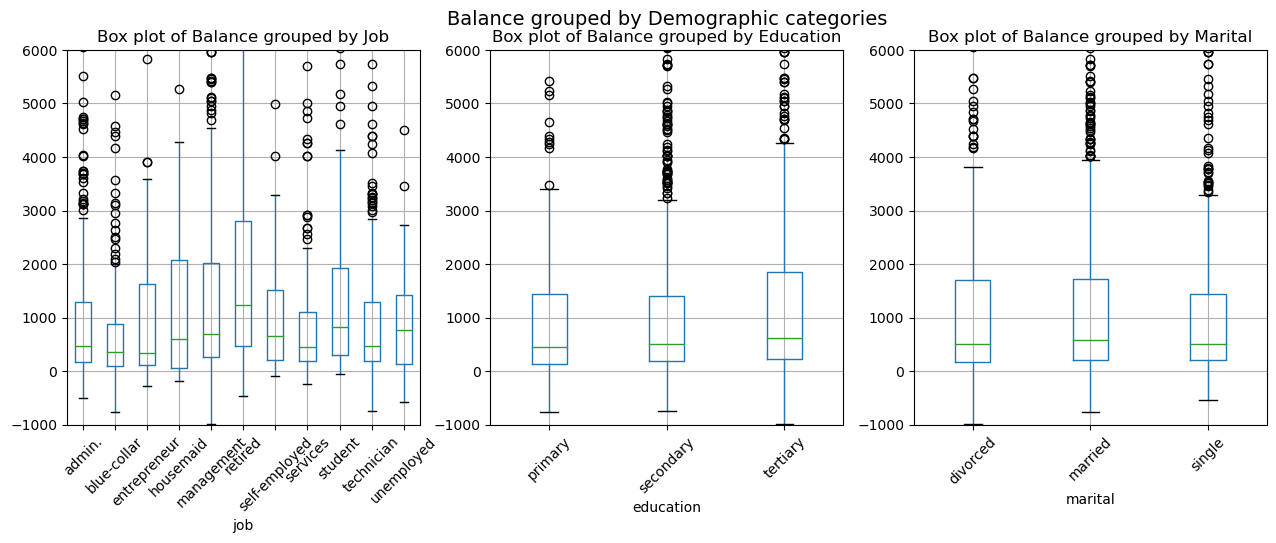

In [53]:
# Create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Create boxplot 1 in subplot 1
df.boxplot(column='balance', by='job', ax=axs[0])
#sns.violinplot(x='job', y='balance', data=df, ax=axs[0])
axs[0].set_title('Box plot of Balance grouped by Job')
axs[0].set_ylim([-1000, 6000])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

# Create boxplot 2 in subplot 2
df.boxplot(column='balance', by='education', ax=axs[1])
#sns.violinplot(x='job', y='balance', data=df, ax=axs[1])
axs[1].set_title('Box plot of Balance grouped by Education')
axs[1].set_ylim([-1000, 6000])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

# Create boxplot 3 in subplot 3
df.boxplot(column='balance', by='marital', ax=axs[2])
#sns.violinplot(x='job', y='balance', data=df, ax=axs[2])
axs[2].set_title('Box plot of Balance grouped by Marital')
axs[2].set_ylim([-1000, 6000])
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)

# Set figure title and show the plot
fig.suptitle('Balance grouped by Demographic categories', fontsize=14)
plt.show()

The plot above suggest that clients *without* a housing loan in our dataset have more even distribution of income than clients with a housing loan, across all levels of education.

Next, we examine the relationship between `balance` and `age` with a regression plot, which the y-axis has been limited to focus to omit outliers and focus on where the majority of the distribution lies.

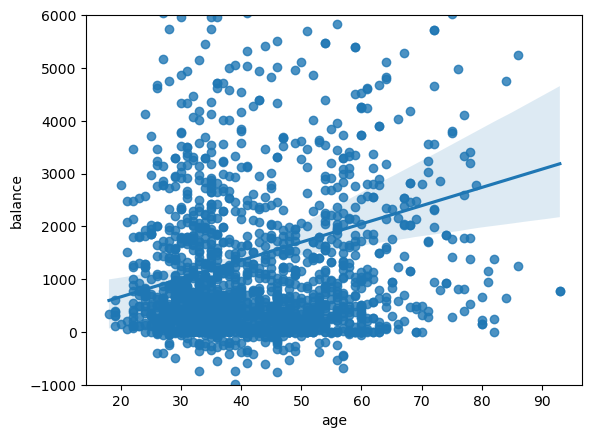

In [54]:
#df.plot.scatter(x='age', y='balance')
sns.regplot(data=df, x='age', y='balance')
plt.ylim([-1000, 6000])
plt.show()

#### E.1.2 Demographic - Conclusions

* From the boxplot, management and retirees and self-employed and jobs have with higher balances and a couple of retired with high balances.
* Tertiary education may be a predictor of higher balance.
* Based on this regression plot we can say that `balance` appears to grow linearly as `age` grows.

### E.2 Combined Distribution Analysis - Financial

Our research question in relation to financial status is as follows;

* How does financial status impact likelihood of subscribing?  
  * Which of a clients financial status attributes are most significant for subscription e.g. credit default, size of current balance, holding personal or housing loan. 

Now considering `housing` and `loan` as probably the most significant of the categorical attributes influencing subscription. Given this we wuld like to analyse relationship between `balance` as the key numeric attribute and key financial categoric variables abive and the `subscription` outcome.

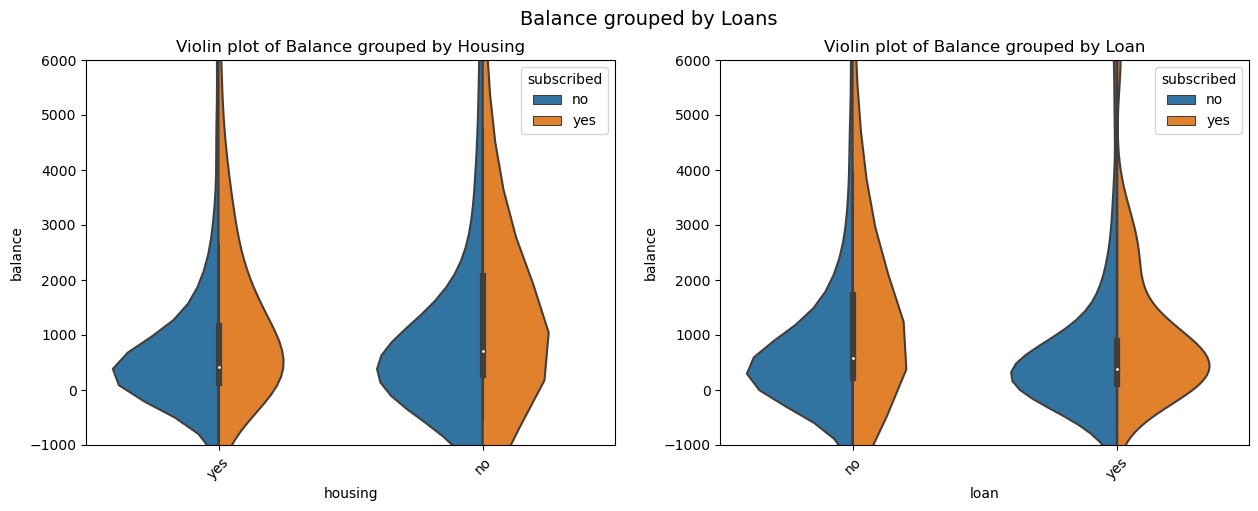

In [55]:
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create boxplot 1 in subplot 1
#df.boxplot(column='balance', by='job', ax=axs[0])
sns.violinplot(x='housing', y='balance', data=df, ax=axs[0], hue='subscribed', split=True)
axs[0].set_title('Violin plot of Balance grouped by Housing')
axs[0].set_ylim([-1000, 6000])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

# Create boxplot 2 in subplot 2
#df.boxplot(column='balance', by='education', ax=axs[1])
sns.violinplot(x='loan', y='balance', data=df, ax=axs[1], hue='subscribed', split=True)
axs[1].set_title('Violin plot of Balance grouped by Loan')
axs[1].set_ylim([-1000, 6000])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

# Set figure title and show the plot
fig.suptitle('Balance grouped by Loans', fontsize=14)
plt.show()

#### E.2.1 Financial - Conclusions

* The plots above suggest that clients *without* loans have more even distribution of income (assuming balance as a placeholder) than clients with a housing loan.

### E.3 Financial - Focus on Financial Status

Now looking at the chances of subscribing to the term product based on whether they hold a housing loan i.e. examining the relation between financial attributes and `subscribed`.

Building pivots table for `default`, `loan` and `housing`, i.e. find the mean number of `subscribed` client for each where each financial attribute is yes and no...

In [56]:
agg_func = lambda x: x.map({'yes':1, 'no':0}).mean()

pivot_table_default = df.pivot_table(values='subscribed', index='default', aggfunc=agg_func)
pivot_table_housing = df.pivot_table(values='subscribed', index='housing', aggfunc=agg_func)
pivot_table_loan = df.pivot_table(values='subscribed', index='loan', aggfunc=agg_func)

Here the values of `subscribed` are grouped by the index `housing`, and the aggfunc is applied to each group. In the example above aggfunc is `mean()`, assuming the yes and no values in column `subscribed` are replaced by 1s and 0s, respectively.

In [57]:
# Print pivot tables
print(pivot_table_default)
print(pivot_table_housing)
print(pivot_table_loan)

         subscribed
default            
no         0.503275
yes        0.066667
         subscribed
housing            
no         0.768563
yes        0.210800
      subscribed
loan            
no      0.546857
yes     0.172000


Creating a stacked chart by plotting balance against other key financial categories and indicating subscriptions...

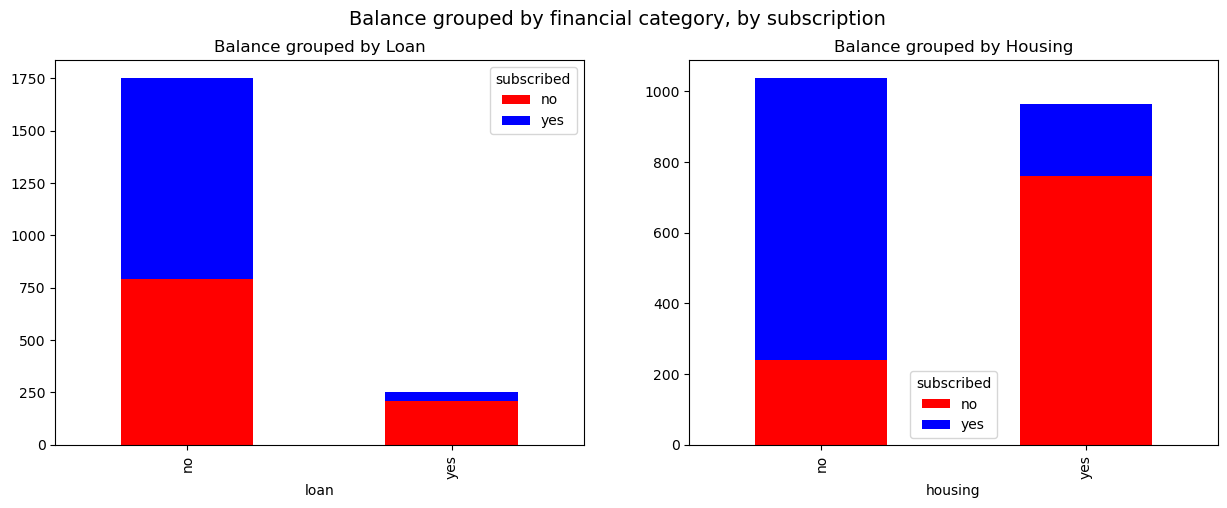

In [58]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Create boxplot 1 in subplot 1
#df.boxplot(column='balance', by='job', ax=axs[0])
#sns.violinplot(x='housing', y='balance', data=df, ax=axs[0], hue='subscribed', split=True)
crosstab_default = pd.crosstab(df['loan'], df['subscribed'])
crosstab_default.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=axes[0])
axes[0].set_title('Balance grouped by Loan')

# Create boxplot 2 in subplot 2
#df.boxplot(column='balance', by='education', ax=axs[1])
#sns.violinplot(x='loan', y='balance', data=df, ax=axs[1], hue='subscribed', split=True)
crosstab_default = pd.crosstab(df['housing'], df['subscribed'])
crosstab_default.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=axes[1])
axes[1].set_title('Balance grouped by Housing')

# Set figure title and show the plot
fig.suptitle('Balance grouped by financial category, by subscription', fontsize=14)
plt.show()

### E.3 Financial - Focus on Financial Status - Conclusions

From the pivot tables, the probability of subscribing is ~21% for applicants with no housing loan, and ~17% for applicants with a personal loan.

# Conclusions

The research question "which clients should the bank focus its next campaign on?" was broken down further the research question;

* In what segment of its client base does the best opportunity exist?
* How does financial status impact likelihood of subscribing?  
* How successful is the current campaign compared with the previous campaign?

Below are conclusions consolidated from previous _Conclusions_ sections. These are inferred from the  _Observations_ sections derived from plots and printed statistics.


## Statistics 
### Numerical Attributes
* There is a long tail of clients with balances higher than the mean.
* Current campaign averages fewer contacts per client (mean = 2) compared with the previous campaign (mean = 2.5), however while some clients where not contacted on the previous campaign (min = 0) all clients are contacted at least once on the current campaign (min > 0).
  * Current campaign may have spread the net more widely contacting all clients but less frequently. 
#### Heat Map
* Other than the moderate correlation between `subscribed` and duration, the heat map suggests generally weak correlation amongst attributes being no greater than 0.22, meaning little to no _linear_ relationship between the variables. 
  * However, we will keep in mind that weak correlation does not necessarily imply that there is _no_ relationship between the variables. 
#### Pairwise Plot 
* Clients called in the middle of the month may be more likely to subscribe
* Longer calls may result in higher likelyhood of a subscribing customers, unless perhaps the additional time is due to making further arrangements or giving further information post subscription i.e. not causation
* If too many days are left without follow-up contact, chances are client loses interest.
* Potential target segment is 20-35 age group with a lot of that cohort not subscribed.
### Categorical Attributes
* Management as the highest job category (23%), a relatively modest level of personal loans 12.5% and housing loans 48% and 56% of client married we get a sense of a professional, reasonably affluent client base.
* It seems that there are or were two intense two-month contact periods in the months of Jan/Feb and Apr/May representing 32% and 27% respectively of all contacts made in the year. It may be worth checking subscribed outcomes from these months compared with other months to determine whether these intense contact periods might be better if changed to other months.
* A small number of clients (8%) we have landline contact - may be worth requestng to update their cellular contact.

## Numerical Distributions
### Demographic
* Potential target segment is 20-35 age group with a lot of that cohort not subscribed.
### Financial
* While an even distribution of subscribed and non-subscribed exists for balances up to 1000, for higher balances there appears to be a significantly higher likelyhood of subscription.
### Campaign
* Clients called in the middle of the month may be more likely to subscribe. Campaigns may consider avoiding start and end of months, perhaps co-incides with monthly bill and loan payments.
* Longer calls coincide with higher likelyhood of subscribing customers - which indicative of a successful call no evidence exists of any causation i.e. i.e. time could simply be agent gathering details or providing further information. Also unsuccessful calls may be likely to end more quickly if prospects simply shut down calls earlier.
* Follow-up call within < ~180 days has a good chance to subscribe clients who didn't subscribe in the previous campaign. If too long between campaigns less chance clients will then subscribe.

## Combined Distributions
### Demographic
* From the boxplot, management and retirees and self-employed and jobs have with higher balances and a couple of retired with high balances.
* Tertiary education may be a predictor of higher balance.
* Based on this regression plot we can say that `balance` appears to grow linearly as `age` grows.

### Financial 
* The plots above suggest that clients *without* loans have more even distribution of income (assuming balance as a placeholder) than clients with a housing loan.
* From the pivot tables, the probability of subscribing is ~21% for applicants with no housing loan, and ~17% for applicants with a personal loan.


## Conclusion

Although not completed here there would be sufficient information to optimise selection of a target market including their relative financial status. There is information to help optimise any future campaign to attempt to convert currently unsubscribed clients.